# PREPARANDO LA DATA

In [1]:
# IMPORTAMOS LAS LIBRERIAS 

import os 
import datetime 

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

In [2]:
# CARGAMOS EL DATASET
data = pd.read_csv('Life Expectancy Data.csv')
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
# VEMOS LOS DATOS FALTANTES
data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
# ELIMINAMOS LA DATA FALTANTE
data.dropna(inplace=True)

In [5]:
# VERIFICAMOS QUE SE HAYA ELIMINADO LA DATA FALTANTE
data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [7]:
categorical_col = data.select_dtypes(exclude='number')
categorical_col

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [8]:
# PODEMOS ELIMIMAR LA COLUMNA data['Country']
data.drop('Country',axis=1,inplace=True)

In [9]:
# CONVERTIMOS LA COLUMNA data['status'] EN NUMERICO
status_dummy = pd.get_dummies(data['Status'])
status_dummy

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
2933,0,1
2934,0,1
2935,0,1
2936,0,1


In [10]:
# ELIMINAMOS LA DATA CATEGORICA 
data.drop('Status',axis=1,inplace=True)

In [11]:
# AGREGAMOS LA DATA DUMMY
data['develop'] = status_dummy['Developed']

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,2.007841e+03,4.087711e+00,2000.00000,2005.000000,2.008000e+03,2.011000e+03,2.015000e+03
Life expectancy,1649.0,6.930230e+01,8.796834e+00,44.00000,64.400000,7.170000e+01,7.500000e+01,8.900000e+01
Adult Mortality,1649.0,1.682153e+02,1.253104e+02,1.00000,77.000000,1.480000e+02,2.270000e+02,7.230000e+02
infant deaths,1649.0,3.255306e+01,1.208472e+02,0.00000,1.000000,3.000000e+00,2.200000e+01,1.600000e+03
Alcohol,1649.0,4.533196e+00,4.029189e+00,0.01000,0.810000,3.790000e+00,7.340000e+00,1.787000e+01
percentage expenditure,1649.0,6.989736e+02,1.759229e+03,0.00000,37.438577,1.451023e+02,5.093900e+02,1.896135e+04
Hepatitis B,1649.0,7.921771e+01,2.560466e+01,2.00000,74.000000,8.900000e+01,9.600000e+01,9.900000e+01
Measles,1649.0,2.224494e+03,1.008580e+04,0.00000,0.000000,1.500000e+01,3.730000e+02,1.314410e+05
BMI,1649.0,3.812862e+01,1.975425e+01,2.00000,19.500000,4.370000e+01,5.580000e+01,7.710000e+01
under-five deaths,1649.0,4.422013e+01,1.628980e+02,0.00000,1.000000,4.000000e+00,2.900000e+01,2.100000e+03


In [13]:
# ESTANDARIZAMOS NUESTRA DATA CON StandardScaler()

s_scaler = StandardScaler()
scaled_data = s_scaler.fit_transform(data)

scaled_data = pd.DataFrame(scaled_data,
columns=data.columns,
index=data.index)

In [14]:
scaled_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1649.0,-7.962905e-15,1.000303,-1.918650,-0.695101,0.039029,0.773159,1.751998
Life expectancy,1649.0,7.239004e-16,1.000303,-2.877169,-0.557450,0.272646,0.647895,2.239859
Adult Mortality,1649.0,-7.756076e-17,1.000303,-1.334813,-0.728135,-0.161371,0.469255,4.428626
infant deaths,1649.0,-4.308931e-18,1.000303,-0.269455,-0.261178,-0.244623,-0.087352,12.974422
Alcohol,1649.0,6.894290e-17,1.000303,-1.122948,-0.924336,-0.184509,0.696829,3.311051
percentage expenditure,1649.0,2.585359e-17,1.000303,-0.397439,-0.376151,-0.314933,-0.107798,10.384044
Hepatitis B,1649.0,1.637394e-16,1.000303,-3.016682,-0.203841,0.382167,0.655638,0.772839
Measles,1649.0,-4.308931e-18,1.000303,-0.220624,-0.220624,-0.219136,-0.183630,12.815610
BMI,1649.0,-6.894290e-17,1.000303,-1.829459,-0.943305,0.282120,0.894832,1.973408
under-five deaths,1649.0,-2.585359e-17,1.000303,-0.271541,-0.265401,-0.246979,-0.093462,12.623872


In [15]:
target = data['Life expectancy ']
features = scaled_data.drop('Life expectancy ',axis=1).values

In [16]:
# DIVIDIMOS LA DATA EN TRAIN_TEST
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(features,target,
test_size=0.2,
random_state=1)

In [17]:
x_train.shape

(1319, 20)

# DEFINIENDO LOS MODELOS 

In [25]:
def single_layer_model():
    '''
    Red Neuronal de una sola copa
    - Optimer : ADAptive Moment (ADAM)
    - Metrics : Mean Square Erro (mse), 
                Mean Absolute Error (mae)
    '''

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, input_shape=(x_train.shape[1],), activation='sigmoid'),
        tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss='mse',
    metrics=['mse','mae'],
    optimizer=optimizer)

    return model 


In [26]:
model = single_layer_model()

# PARA VER UN RESUMEN DE NUESTRO MODELO
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


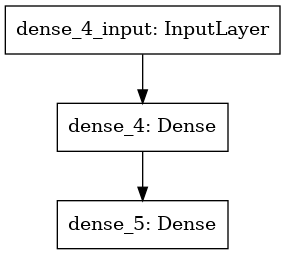

In [27]:
# PARA VER DE MANERA VISUAL NUESTRO MODELO
tf.keras.utils.plot_model(model)

In [28]:
num_epochs = 100
training_history = model.fit(x_train,
                            y_train,
                            epochs=num_epochs,
                            validation_split=0.2,
                            verbose=True)

Epoch 1/100
33/33 [==============================] - 1s 6ms/step - loss: 4664.8413 - mse: 4664.8413 - mae: 67.8017 - val_loss: 3971.8203 - val_mse: 3971.8203 - val_mae: 62.4929
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 3725.1182 - mse: 3725.1182 - mae: 60.5338 - val_loss: 3051.9023 - val_mse: 3051.9023 - val_mae: 54.7500
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 2856.0285 - mse: 2856.0285 - mae: 52.9648 - val_loss: 2131.0227 - val_mse: 2131.0227 - val_mae: 45.4923
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 1896.7800 - mse: 1896.7800 - mae: 42.8562 - val_loss: 1339.7130 - val_mse: 1339.7130 - val_mae: 35.8572
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 1183.9187 - mse: 1183.9187 - mae: 33.5022 - val_loss: 784.7217 - val_mse: 784.7217 - val_mae: 26.8997
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 661.1609 - mse: 661.1609 - mae: 24.4697 - va

In [29]:
# HACEMOS Y_PRED
y_pred = model.predict(x_test)

In [31]:
# HALLAMOS R2_SCORE
r2 = r2_score(y_test, y_pred)
r2

0.9294607120438704

In [40]:
# VISUALIZAMOS Y_TEST AL LADO DE Y_PRED
pd.DataFrame({'y_test':y_test.values.flatten(),
'y_perd':y_pred.flatten(),
'error':abs(y_test.values.flatten()-y_pred.flatten())}
).sample(15)

,y_test,y_perd,error
8,67.5,68.552177,1.052177
305,56.6,55.985485,0.614515
199,81.0,79.652603,1.347397
16,47.8,49.832558,2.032558
51,69.9,72.469727,2.569727
6,65.9,64.889168,1.010832
66,49.2,51.328804,2.128804
64,69.5,69.358330,0.141670
223,68.4,66.764465,1.635535
103,72.0,74.466019,2.466019


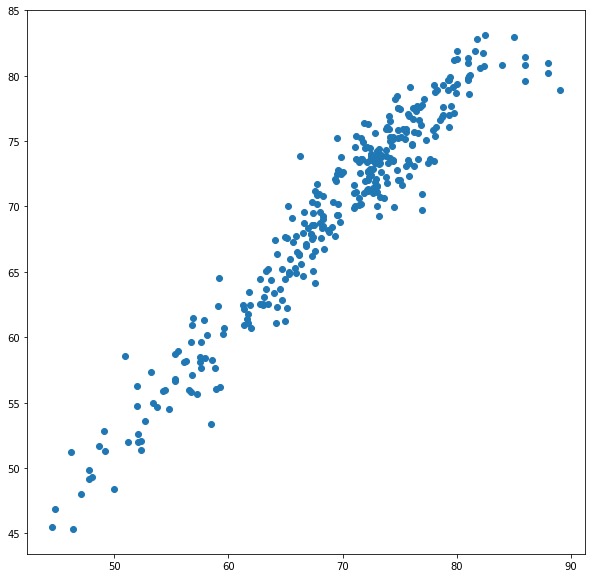

In [41]:
# PARA VER LA CORRELACIÓN DE FORMA MÁS VISUAL 
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred)
plt.show()